In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import re

## Первый датасет rent - чистка данных




In [ ]:
#uploaded = files.upload()

In [ ]:
df_rent = pd.read_csv("../Web-parsing/data-estates/estate_cities.csv")

In [ ]:
df_rent

,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district
0,450000,"улица Шумкина, 20 ст1",Москва,1698,265,Универсальное помещение,https://msk.n1.ru/view/115904136/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
1,4097925,"улица Берсеневская набережная, 8 ст1",Москва,3249,1260,Универсальное помещение,https://msk.n1.ru/view/115813194/?open_card_kn,"улица Берсеневская набережная, 8 ст1, Москва, ...",Адрес не найден
2,68125,"улица Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
3,65000,"улица Николая Озерова, 2",Москва,4333,15,Универсальное помещение,https://msk.n1.ru/view/115738288/?open_card_kn,"улица Николая Озерова, 2, Москва, Россия",район Покровское-Стрешнево
4,490000,"улица Новослободская, 50 ст2",Москва,1580,310,Универсальное помещение,https://msk.n1.ru/view/115137027/?open_card_kn,"улица Новослободская, 50 ст2, Москва, Россия",Тверской район
...,...,...,...,...,...,...,...,...,...
14575,100000,Громова,Екатеринбург,1000,100,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115624215/?ope...,"Громова, Екатеринбург, Россия",Новогромовское сельское поселение
14576,150000,Краснофлотцев,Екатеринбург,1428,105,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/114934584/?ope...,"Краснофлотцев, Екатеринбург, Россия",Орджоникидзевский район
14577,199500,Восточная,Екатеринбург,750,266,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/113846166/?ope...,"Восточная, Екатеринбург, Россия",Репьёвский сельсовет
14578,85000,Фурманова,Екатеринбург,1562,54,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115608931/?ope...,"Фурманова, Екатеринбург, Россия",Алматинская область


In [ ]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14580 entries, 0 to 14579
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rent, rub/month           14580 non-null  int64 
 1   full_address              14580 non-null  object
 2   city                      14580 non-null  object
 3   price_per_sqm, rub/month  14580 non-null  int64 
 4   square, m^2               14580 non-null  int64 
 5   type                      14580 non-null  object
 6   url                       14580 non-null  object
 7   OSM_address               14580 non-null  object
 8   district                  14580 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


Датасет rent содержит данные об объявлениях об аренде помещений в 7 городах-миллиониках России.

**Описание признаков:**
* `rent, rub/month` - арендная плата в рублях в месяц
* `full_address` - физический адрес помещения (улица, дом, строение)
* `city` - город, где находится помещение
* `price_per_sqm, rub/month` - цена за квадратный метр в месяц
* `square, m^2` - площадь помещения в квадратных метрах
* `type` - тип помещения
* `url` - ссылка на объявление
* `OSM_address` - полный физический адрес помещения с указанием города и страны
* `district` - название района города, где находится помещение

In [ ]:
df_rent = df_rent.rename(columns={'full_address': 'address'})
df_rent['address'] = df_rent['address'].str.split(',').str[0]

In [ ]:
df_rent.isna().sum()

,0
"rent, rub/month",0
address,0
city,0
"price_per_sqm, rub/month",0
"square, m^2",0
type,0
url,0
OSM_address,0
district,0


В признаках не содержится пропусков. В районах есть значение "Адрес не найден". Заменим на nan и удалим, потому что мы не можем провести анализ этих помещений


**Причины пропусков:**
1. В оригинальном объявлении владелец скрыл адрес, указав только район


Удалим строки с пропущенными адресами, так как адрес является важным признаком + пропуски составляют меньше процента

In [ ]:
df_rent = df_rent.replace({'Адрес не найден': np.nan})

In [ ]:
df_rent.isna().sum()

,0
"rent, rub/month",0
address,0
city,0
"price_per_sqm, rub/month",0
"square, m^2",0
type,0
url,0
OSM_address,0
district,853



---

Далее рассмотрим, есть ли аномалии в нашем датасете

In [ ]:
int_columns = ['rent, rub/month', 'price_per_sqm, rub/month', 'square, m^2']

for i in int_columns:
    print(f'В столбце {i} количество значений меньше или равно 0: {(df_rent[i] <= 0).sum}')

В столбце rent, rub/month количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: rent, rub/month, Length: 14580, dtype: bool>
В столбце price_per_sqm, rub/month количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: price_per_sqm, rub/month, Length: 14580, dtype: bool>
В столбце square, m^2 количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: square, m^2, Length: 14580, dtype: bool>


В нашем датасете нет площади и стоимостей меньше 0, так что аномалий в датасете нет



---

Рассмотрим выбросы

In [ ]:
df_rent.describe()

,"rent, rub/month","price_per_sqm, rub/month","square, m^2"
count,1.458000e+04,1.458000e+04,14580.000000
mean,1.052255e+07,5.167392e+03,364.060562
std,1.044013e+09,1.501926e+05,2513.037938
min,2.500000e+02,1.000000e+00,1.000000
25%,1.125000e+05,1.235750e+03,60.000000
50%,2.500205e+05,2.119000e+03,115.000000
75%,6.377775e+05,3.645000e+03,255.000000
max,1.258000e+11,1.700000e+07,220000.000000


<Axes: xlabel='city', ylabel='rent, rub/month'>

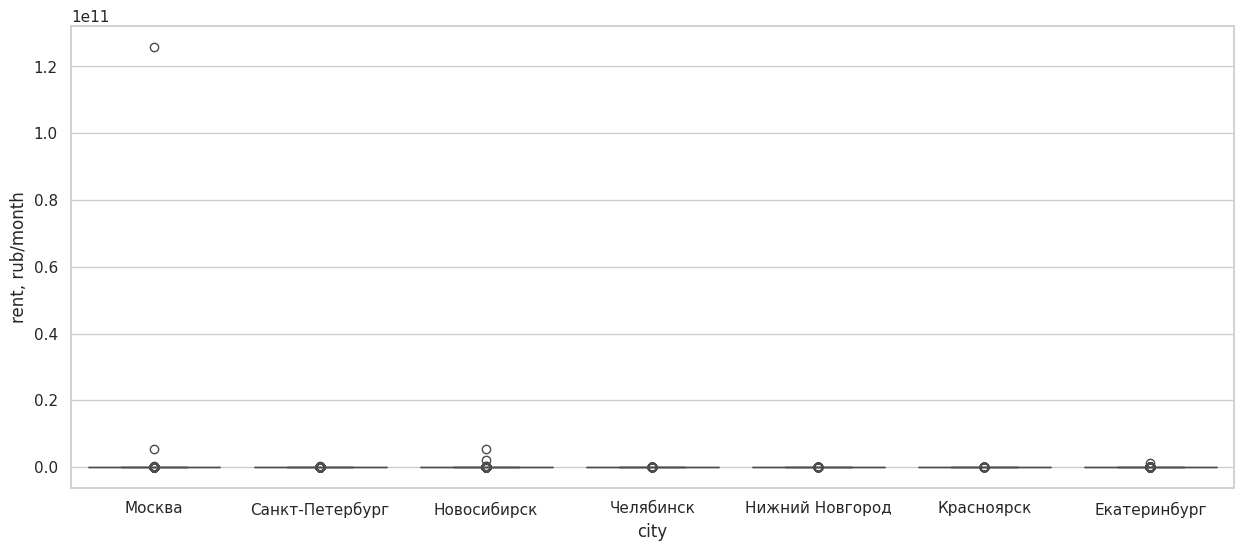

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='rent, rub/month')

<Axes: xlabel='city', ylabel='square, m^2'>

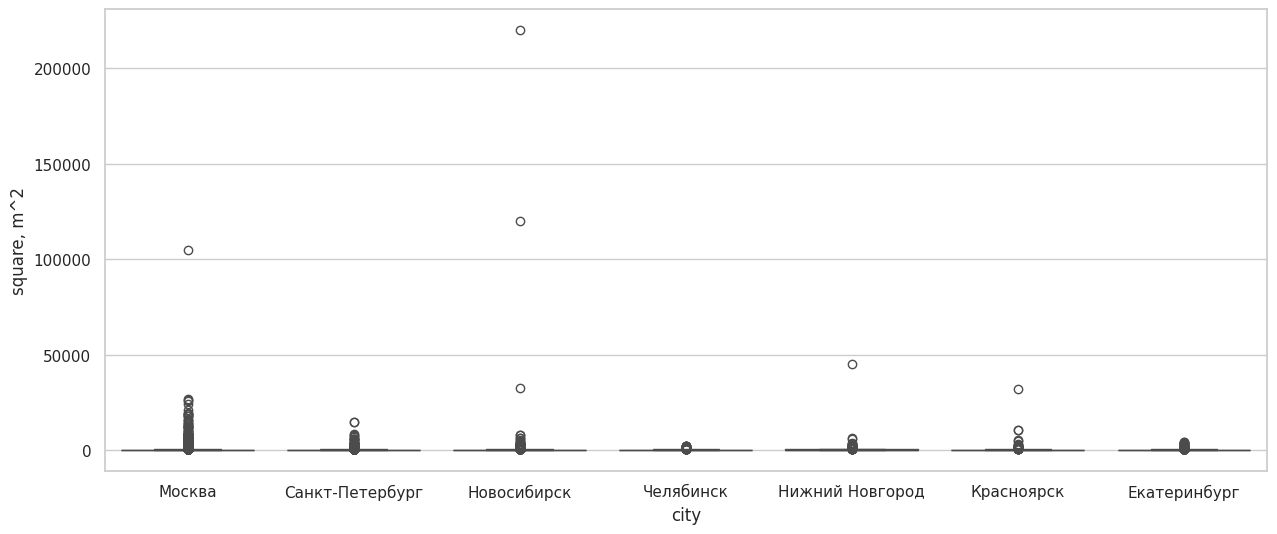

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='square, m^2')

boxplot практически невозможно разглядеть, можем заметить, что есть огромные выбросы - огромные цены на аренду. Например, в Санкт-Петербурге есть площадь с ценой около 1400000 рублей в месяц.
Клиент открывает первый бизнес и не готов вкладывать огромные сбережения, поэтому отбросим огромные цены - выбросы с помощью самого популярного способа удалять выбросы:

- Ниже первой квартили - `3 iqr` (межквартильное расстояние)
- Выше третьей квартили + `3 iqr` (межквартильное расстояние)

Аналогично для первого бизнеса тяжело обустраивать и содержать огромные помещения (идут расходы на мебель, коммунальные услуги, обеспечение, ремонт и т. п.), поэтому уберем выбросы с большими площадями, но поменяем константу на 5

In [ ]:
Q1_rent = df_rent['rent, rub/month'].describe()['25%']
Q3_rent = df_rent['rent, rub/month'].describe()['75%']
Q1_S = df_rent['square, m^2'].describe()['25%']
Q3_S = df_rent['square, m^2'].describe()['75%']

IQR_rent = Q3_rent - Q1_rent
IQR_S = Q3_S - Q1_S

In [ ]:
df_rent = df_rent[(df_rent['rent, rub/month'] < (Q3_rent + 3 * IQR_rent)) & (df_rent['square, m^2'] < (Q3_S + 5 * IQR_S))] # минимальные значения не убираем, т. к. нам выгодно мало тратить

In [ ]:
df_rent.describe()

,"rent, rub/month","price_per_sqm, rub/month","square, m^2"
count,1.343800e+04,13438.000000,13438.000000
mean,3.869580e+05,3066.900804,171.165575
std,4.237176e+05,3615.712513,190.289470
min,2.500000e+02,1.000000,1.000000
25%,1.030000e+05,1208.000000,56.000000
50%,2.300000e+05,2059.000000,103.000000
75%,5.000000e+05,3509.000000,205.000000
max,2.201000e+06,120000.000000,1225.000000


Между третьим квантилем и максимумом все еще большой разброс, который указывает, что есть выбросы

<Axes: xlabel='city', ylabel='rent, rub/month'>

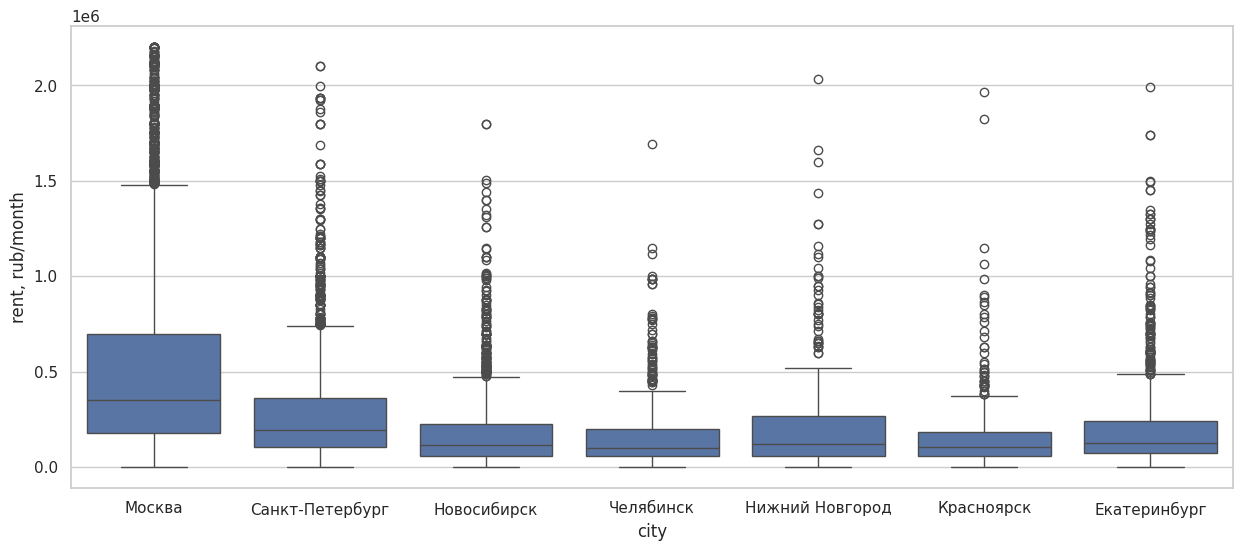

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='rent, rub/month')

Теперь выбросов с низкой ценой за m^2 нет, но есть много выбросов с высокой ценой. В таком случае тратитиься на аренду данных помещений не целесообазно для нашего клиента, поэтому в дальнейшем анализе мы не будем их рассматривать.

<Axes: xlabel='city', ylabel='square, m^2'>

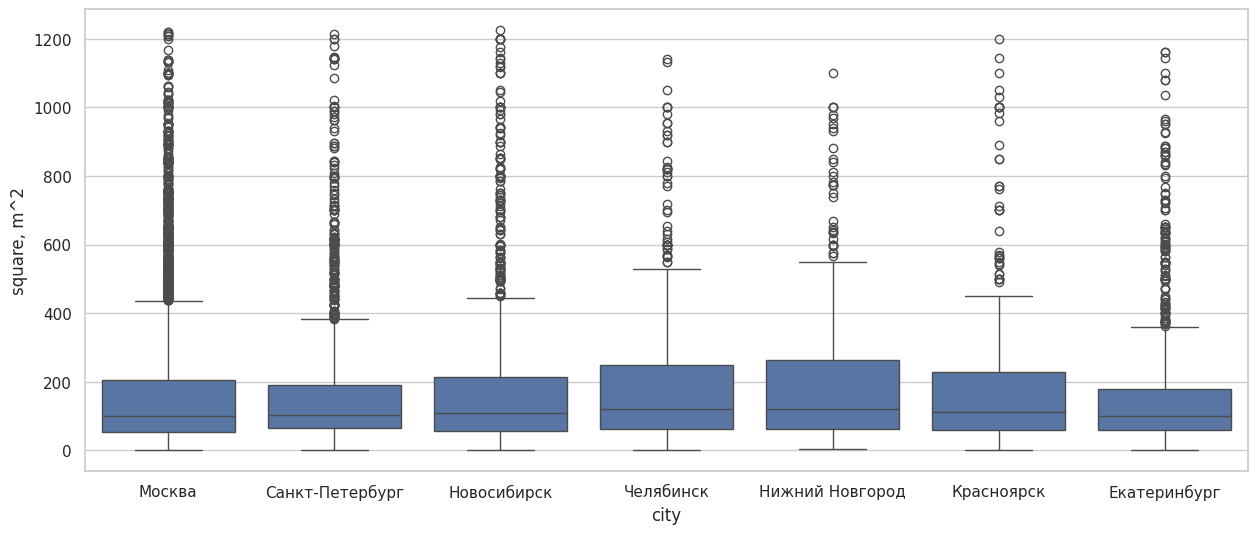

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='square, m^2')

Теперь выбросов с маленькой площадью нет, но есть много выбросов с большой площадью. Данные помещения неудобны для открытия первой точки, поэтому далее мы не будем их рассматривать.

## Второй датасет bars - чистка данных

In [ ]:
#uploaded = files.upload()

In [ ]:
df_bars = pd.read_csv("../API_2ГИС/data/bars_top_cities.csv")

In [ ]:
df_bars

,address_name,full_name,id,name,purpose_name,rubrics,type,address.building_id,address.components,address.postcode,...,reviews.org_review_count,reviews.org_review_count_with_stars,address.landmark_name,address_comment,address.building_name,reviews.rating,reviews.review_count,reviews.recommendation_count,building_name,city
0,"деревня Сосенки, 150","Сосенки, деревня Сосенки, 150",70000001020034740,"New Moscow, ресторан",Ресторан,"[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,4504235306854603,"[{'number': '150', 'street': 'деревня Сосенки'...",108802.0,...,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Москва
1,"Скандинавский бульвар, 12",NaN,70000001096460413,"The Beer, крафтовый бар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076177876871,"[{'number': '12', 'street': 'Скандинавский бул...",108801.0,...,31.0,53.0,ЖК Скандинавия,NaN,NaN,NaN,NaN,NaN,NaN,Москва
2,"улица Александры Монаховой, 90 к4",NaN,70000001087699714,"Брискетная №1, паб",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076160147189,"[{'number': '90 к4', 'street': 'улица Александ...",108826.0,...,11.0,15.0,ЖК Бунинские луга,1 этаж,NaN,NaN,NaN,NaN,NaN,Москва
3,"улица Александры Монаховой, 90 к3",NaN,70000001085334903,"The Beer, крафтовый бар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076160147030,"[{'number': '90 к3', 'street': 'улица Александ...",108826.0,...,31.0,53.0,ЖК Бунинские луга,1 этаж,NaN,NaN,NaN,NaN,NaN,Москва
4,"улица Липовый парк, 8 к2",NaN,70000001034540345,"Липа Бар, гастробар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,4504235300147859,"[{'number': '8 к2', 'street': 'улица Липовый п...",108801.0,...,23.0,40.0,ЖК Москва А101,1 этаж; около отделения Почта России,NaN,NaN,NaN,NaN,NaN,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,"Комсомольский проспект, 92",NaN,70000001089549396,"Red Card, спортбар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980505533,"[{'number': '92', 'street': 'Комсомольский про...",454100.0,...,35.0,54.0,NaN,2 этаж,NaN,NaN,NaN,NaN,NaN,Челябинск
2524,"40-летия Победы, 1",NaN,70000001040995602,"On taps, бар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697997105962,"[{'number': '1', 'street': '40-летия Победы', ...",454100.0,...,296.0,308.0,NaN,2 этаж,Ёлки,4.4,8.0,NaN,NaN,Челябинск
2525,"шоссе Металлургов, 5а/1",NaN,70000001031542868,"Ez bar, танцевальный бар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980491909,"[{'number': '5а/1', 'street': 'шоссе Металлург...",454038.0,...,137.0,167.0,рынок Михеевский,2 этаж,NaN,3.5,2.0,NaN,NaN,Челябинск
2526,"улица 60-летия Октября, 38",NaN,70000001094330387,"Билли Бонс, гриль-бар",NaN,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980490672,"[{'number': '38', 'street': 'улица 60-летия Ок...",454047.0,...,43.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Челябинск


In [ ]:
df_bars.iloc[2177, 5]

"[{'alias': 'bary', 'id': '159', 'kind': 'additional', 'name': 'Бары', 'parent_id': '2', 'short_id': 159}, {'alias': 'restorany', 'id': '164', 'kind': 'primary', 'name': 'Рестораны', 'parent_id': '2', 'short_id': 164}, {'alias': 'dostavka_edy', 'id': '1203', 'kind': 'additional', 'name': 'Доставка еды', 'parent_id': '2', 'short_id': 1203}]"

In [ ]:
df_bars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   address_name                             2515 non-null   object 
 1   full_name                                118 non-null    object 
 2   id                                       2528 non-null   int64  
 3   name                                     2528 non-null   object 
 4   purpose_name                             118 non-null    object 
 5   rubrics                                  2528 non-null   object 
 6   type                                     2528 non-null   object 
 7   address.building_id                      2528 non-null   int64  
 8   address.components                       2528 non-null   object 
 9   address.postcode                         2527 non-null   float64
 10  point.lat                                2528 no

Датасет bars содержит данные о барах в 7 городах-миллиониках

**Описание признаков:**
* `address_name ` - адрес бара (улица, дом, строение)
* `full_name` - полное официальное юридическое название с указанием адреса
* `id` - уникальный код бара на 2ГИС
* `name` - название бара
* `purpose_name` - целевой бизнес завидения (например, ресторан)
* `rubrics` - категории заведения
* `type` - тип точки сети (branch-филиал)
* `address.building_id` - айди здания на 2ГИС
* `address.components` - "разобранный" адрес (номер дома, улица и т. д.)
* `address.postcode` - почтовый индекс
* `point.lat` - широта
* `point.lon` - долгота
* `reviews.general_rating` - средний рейтинг заведения (максимум 5.0)
* `reviews.general_review_count` - общее количество текстовых отзывов
* `reviews.general_review_count_with_stars` - общее количество отзывов с выставленными оценками
* `reviews.is_reviewable` - можно ли оставить отзыв
* `reviews.is_reviewable_on_flamp` - можно ли оставить отзыв на flamp - помощник 2ГИС
* `reviews.items` - общая сводка данных об отзывах
* `reviews.org_rating` - средний рейтинг организации - всей сети (максимум 5.0)
* `reviews.org_review_count` - бщее количество текстовых отзывов у оргнизации - всей сети
* `reviews.org_review_count_with_stars` - общее количество отзывов с выставленными оценками организации - всей сети
* `address.landmark_name` - ориентир (жк, парк, рынок и т. п.)
* `address_comment` - комментарий к адресу (этаж, дополнительные ориентиры)
* `address.building_name` - название здания (тц, трк, жк и т. п.)
* `reviews.rating` - средний рейтинг, собранных за последние n дней (как правило, n равно 1) для обновления рейтинга
* `reviews.review_count` - количество, собранных за последние n дней (как правило, n равно 1) для обновления количества оценок
* `reviews.recommendation_count` - количество рекомендаций организации
* `building_name` - название здания-бара, если здание полностью является заведением
* `city` - город, в котором находится бар




Рассмотрим пропуски

In [ ]:
df_bars.isna().sum()

,0
address_name,13
full_name,2410
id,0
name,0
purpose_name,2410
rubrics,0
type,0
address.building_id,0
address.components,0
address.postcode,1


Есть столбцы с огромным количеством пропусков, посмотрим пропуски в процентном соотношении

In [ ]:
df_miss = (df_bars.isna().sum()/len(df_bars)) * 100
df_miss = df_miss.rename('missing_percentage')
df_miss

,missing_percentage
address_name,0.514241
full_name,95.332278
id,0.000000
name,0.000000
purpose_name,95.332278
rubrics,0.000000
type,0.000000
address.building_id,0.000000
address.components,0.000000
address.postcode,0.039557


Большинство столбцов с большим количеством пропуском либо являются дополнительной информацией, которая может иметься не у всех заведений, либо это полная юридическая информация, которую редко прописывают на поисковых картах

Если у признака больше 50% пропусков, то удаляем его, он не так информативен и ничем нам не поможет. Удалим эти столбцы

In [ ]:
df_bars = df_bars.drop(columns=list((df_miss[df_miss >= 50]).index))

In [ ]:
df_bars

,address_name,id,name,rubrics,type,address.building_id,address.components,address.postcode,point.lat,point.lon,...,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.is_reviewable,reviews.is_reviewable_on_flamp,reviews.items,reviews.org_rating,reviews.org_review_count,reviews.org_review_count_with_stars,address_comment,city
0,"деревня Сосенки, 150",70000001020034740,"New Moscow, ресторан","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,4504235306854603,"[{'number': '150', 'street': 'деревня Сосенки'...",108802.0,55.554086,37.431872,...,11.0,16.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.9,11.0,16.0,NaN,Москва
1,"Скандинавский бульвар, 12",70000001096460413,"The Beer, крафтовый бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076177876871,"[{'number': '12', 'street': 'Скандинавский бул...",108801.0,55.562626,37.501272,...,9.0,17.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.8,31.0,53.0,NaN,Москва
2,"улица Александры Монаховой, 90 к4",70000001087699714,"Брискетная №1, паб","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076160147189,"[{'number': '90 к4', 'street': 'улица Александ...",108826.0,55.542578,37.480596,...,11.0,15.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.4,11.0,15.0,1 этаж,Москва
3,"улица Александры Монаховой, 90 к3",70000001085334903,"The Beer, крафтовый бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076160147030,"[{'number': '90 к3', 'street': 'улица Александ...",108826.0,55.543761,37.481012,...,6.0,13.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.8,31.0,53.0,1 этаж,Москва
4,"улица Липовый парк, 8 к2",70000001034540345,"Липа Бар, гастробар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,4504235300147859,"[{'number': '8 к2', 'street': 'улица Липовый п...",108801.0,55.570096,37.488297,...,23.0,40.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.7,23.0,40.0,1 этаж; около отделения Почта России,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,"Комсомольский проспект, 92",70000001089549396,"Red Card, спортбар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980505533,"[{'number': '92', 'street': 'Комсомольский про...",454100.0,55.192700,61.294790,...,35.0,54.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.9,35.0,54.0,2 этаж,Челябинск
2524,"40-летия Победы, 1",70000001040995602,"On taps, бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697997105962,"[{'number': '1', 'street': '40-летия Победы', ...",454100.0,55.191844,61.281953,...,65.0,66.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.8,296.0,308.0,2 этаж,Челябинск
2525,"шоссе Металлургов, 5а/1",70000001031542868,"Ez bar, танцевальный бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980491909,"[{'number': '5а/1', 'street': 'шоссе Металлург...",454038.0,55.249577,61.399960,...,137.0,167.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.7,137.0,167.0,2 этаж,Челябинск
2526,"улица 60-летия Октября, 38",70000001094330387,"Билли Бонс, гриль-бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,2111697980490672,"[{'number': '38', 'street': 'улица 60-летия Ок...",454047.0,55.262826,61.385830,...,43.0,63.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.6,43.0,63.0,NaN,Челябинск


In [ ]:
df_bars.isna().sum()

,0
address_name,13
id,0
name,0
rubrics,0
type,0
address.building_id,0
address.components,0
address.postcode,1
point.lat,0
point.lon,0


1. Рассмотрим пропуски в колонке address_name

In [ ]:
df_bars[df_bars['address_name'].isnull()]

,address_name,id,name,rubrics,type,address.building_id,address.components,address.postcode,point.lat,point.lon,...,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.is_reviewable,reviews.is_reviewable_on_flamp,reviews.items,reviews.org_rating,reviews.org_review_count,reviews.org_review_count_with_stars,address_comment,city
749,NaN,70000001059315386,"Нахмеле bottle shop, магазин-бар разливного пива","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,70030076329019455,"[{'comment': 'Красногорск', 'type': 'location'}]",143401.0,55.817074,37.358705,...,14.0,19.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.3,14.0,19.0,NaN,Москва
751,NaN,70000001097251436,"Дымовой, бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076329019455,"[{'comment': 'Красногорск', 'type': 'location'}]",143401.0,55.817156,37.358863,...,NaN,NaN,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",NaN,NaN,NaN,NaN,Москва
1112,NaN,70000001101986571,Pool Bar Chalet,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076187532658,"[{'comment': 'Химки', 'type': 'location'}]",141407.0,55.880890,37.434693,...,NaN,NaN,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",NaN,NaN,NaN,NaN,Москва
1237,NaN,70000001101972051,"Блюз старого мира, бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030077059728517,"[{'comment': 'Королёв', 'type': 'location'}]",141073.0,55.911827,37.874141,...,NaN,NaN,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",NaN,NaN,NaN,NaN,Москва
1299,NaN,70000001094998207,"VIP База, магазин-бар","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,70030076154472405,"[{'comment': 'Санкт-Петербург', 'type': 'locat...",192283.0,59.828316,30.398381,...,2.0,2.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",5.0,2.0,2.0,NaN,Санкт-Петербург
1300,NaN,70000001095015436,"Пивной дворик, магазин разливных напитков","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,70030076131139668,"[{'comment': 'Санкт-Петербург', 'type': 'locat...",192283.0,59.828558,30.398931,...,2.0,3.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",5.0,1.0,2.0,NaN,Санкт-Петербург
1350,NaN,70000001022964626,"Twin Peaks Craft Beer, бар","[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,70030076168715253,"[{'comment': 'Санкт-Петербург', 'type': 'locat...",196105.0,59.877659,30.316598,...,16.0,24.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.7,69.0,118.0,NaN,Санкт-Петербург
1413,NaN,70000001101268590,Пивной бар,"[{'alias': 'bary', 'id': '159', 'kind': 'prima...",branch,5348660212687324,"[{'comment': 'Кудрово', 'type': 'location'}]",188693.0,59.892592,30.500205,...,NaN,NaN,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",NaN,NaN,NaN,22 ряд; 14 бокс,Санкт-Петербург
1753,NaN,5348552838580813,"На Речке, ресторан","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,70030077083546688,"[{'comment': 'Санкт-Петербург', 'type': 'locat...",197372.0,60.009071,30.226121,...,40.0,47.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.1,40.0,47.0,NaN,Санкт-Петербург
1822,NaN,70000001076684324,"Дым и Рим, ресторан","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",branch,70030077071203249,"[{'comment': 'д.\xa0Новое Девяткино, Building_...",188673.0,60.057810,30.473583,...,87.0,119.0,True,True,"[{'is_reviewable': True, 'tag': '2gis_reviews'...",4.2,87.0,119.0,NaN,Санкт-Петербург


Удаляем строчки с пустыми значениями в колонке `address_name`. Нам важны адреса для дальнейшего анализа, потому что мы хотим выявить районы и сориентировать клиента по выгодному и хорошему месту открытия бара.

In [ ]:
df_bars = df_bars.dropna(subset=['address_name'])

2.

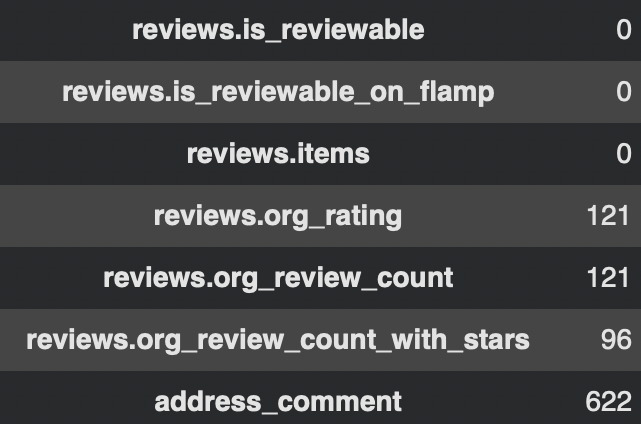*рейтинги*...?

Удаляем колонки из таблички выше, кроме `reviews.org.rating`.

- `reviews.is_reviewable`: значение этого столбца не дает нам информации для анализа территории и района
- `reviews.is_reviewable_on_flamp`: значение этого столбца не дает нам информации для анализа территории и района
- `reviews.items`: в этом столбце находится та же информация, что и в столбцах, описанных выше
- `reviews.org_review_count`: значение этого столбца не дает нам информации для анализа территории и района
- `reviews.org_review_count_with_stars`: значение этого столбца не дает нам информации для анализа территории и района
- `address_comment`:  значение этого столбца не дает нам информации для анализа территории и района

In [ ]:
df_bars = df_bars.drop(columns=['reviews.is_reviewable', 'reviews.is_reviewable_on_flamp', 'reviews.items',
                                'reviews.org_review_count', 'reviews.org_review_count_with_stars',
                                 'address_comment'])

3. address_comment имеет много пропусков и дополняет информацию о местоположении бара. Например, этаж, где вход и т. п. Эта информация не поможет нам в анализе, поэтому удалим.

4. Также нам не нужны айди с 2ГИС, потому что это внутренняя работа 2ГИС.

5. type показывает только одно значение - branch. Признак не репрезентативный

In [ ]:
df_bars = df_bars.drop(columns=['id', 'type', 'address.building_id', 'address.components'])

In [ ]:
df_bars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 0 to 2527
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   address_name                             2515 non-null   object 
 1   name                                     2515 non-null   object 
 2   rubrics                                  2515 non-null   object 
 3   address.postcode                         2514 non-null   float64
 4   point.lat                                2515 non-null   float64
 5   point.lon                                2515 non-null   float64
 6   reviews.general_rating                   2390 non-null   float64
 7   reviews.general_review_count             2390 non-null   float64
 8   reviews.general_review_count_with_stars  2423 non-null   float64
 9   reviews.org_rating                       2398 non-null   float64
 10  city                                     2515 non-nul

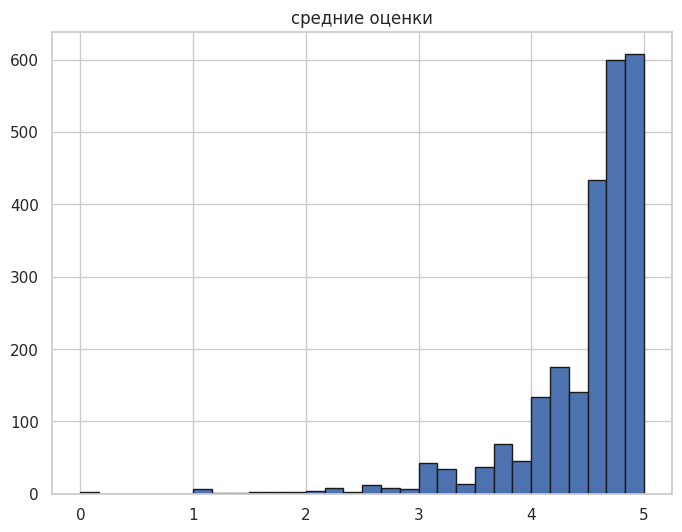

In [ ]:
figsize(8, 6)

plt.hist(df_bars['reviews.general_rating'], bins = 30, edgecolor='k')

plt.title('средние оценки')
plt.show()

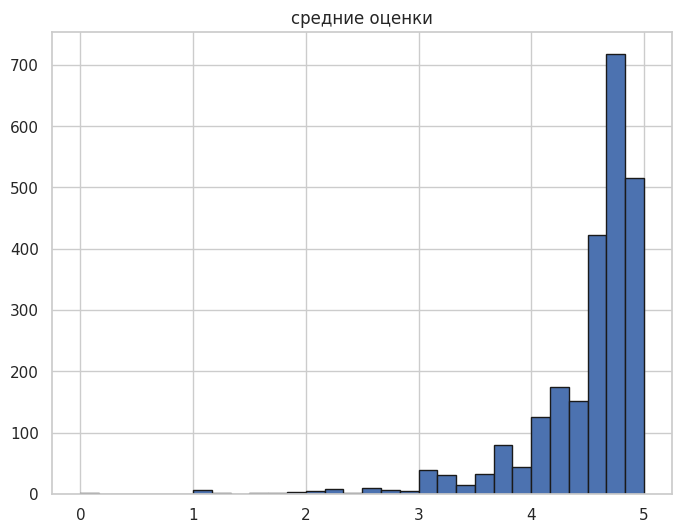

In [ ]:
figsize(8, 6)

plt.hist(df_bars['reviews.org_rating'], bins = 30, edgecolor='k')

plt.title('средние оценки')
plt.show()

In [ ]:
df_bars['reviews.general_rating'].corr(df_bars['reviews.org_rating'])

np.float64(0.9394770603158086)

In [ ]:
abs(df_bars['reviews.general_rating'] - (df_bars['reviews.org_rating'])).mean()

np.float64(0.0600418410041841)

In [ ]:
len(df_bars[df_bars['reviews.general_rating'].isnull()]) - len(df_bars[df_bars['reviews.general_rating'].isnull() & df_bars['reviews.org_rating'].isnull()])

8

Рассмотрим корреляцию столбца `reviews.general_rating` и `reviews.org_rating`, она равняется 0,94. Данная корреляция высокая, сильно положительная, что показывает сильную линейную зависимость данных признаков. Из чего мы можем сделать вывод, что мы можем заполнить значение 8 ячеек, у которых отсутсвует занчение в `reviews.general_rating`, значениями из столбца `reviews.org_rating`

In [ ]:
df_bars['reviews.general_rating'] = df_bars['reviews.general_rating'].fillna(df_bars['reviews.org_rating'])

### Добавим рубрики

In [ ]:
import re

In [ ]:
# в rubrics надо найти все элементы типа " 'name': '...' "
df_bars["rubrics"][0]

"[{'alias': 'bary', 'id': '159', 'kind': 'additional', 'name': 'Бары', 'parent_id': '2', 'short_id': 159}, {'alias': 'restorany', 'id': '164', 'kind': 'primary', 'name': 'Рестораны', 'parent_id': '2', 'short_id': 164}, {'alias': 'dostavka_edy', 'id': '1203', 'kind': 'additional', 'name': 'Доставка еды', 'parent_id': '2', 'short_id': 1203}]"

In [ ]:
# для этого используес регулярку
names = re.findall(r"'name'\s*:\s*'([^']+)'", df_bars["rubrics"][0])
names

['Бары', 'Рестораны', 'Доставка еды']

In [ ]:
temp_df = pd.DataFrame()
temp_df['rubrics_list'] = df_bars['rubrics'].str.findall(r"'name'\s*:\s*'([^']+)'")
df_bars['rubrics_new'] = temp_df['rubrics_list'].apply(lambda x: ", ".join(x))
df_bars.sample(3)

,address_name,name,rubrics,address.postcode,point.lat,point.lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new
1439,"набережная канала Грибоедова, 38","Ворон и ворон, шаманский бар","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",191023.0,59.930768,30.321074,4.9,340.0,578.0,4.9,Санкт-Петербург,"Бары, Рестораны, Доставка еды"
1756,"Энгельса проспект, 124 к1 лит А","Хаус бар, рестобар","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",194356.0,60.039230,30.323702,4.8,471.0,538.0,4.9,Санкт-Петербург,"Бары, Рестораны, Караоке-залы, Банкетные залы,..."
2118,"улица Малышева, 51","Влади, панорамный ресторан","[{'alias': 'bary', 'id': '159', 'kind': 'addit...",620000.0,56.835991,60.614245,4.3,719.0,855.0,4.3,Екатеринбург,"Бары, Рестораны, Банкетные залы"


In [ ]:
df_bars = df_bars.drop("rubrics", axis = 1)
df_bars

,address_name,name,address.postcode,point.lat,point.lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new
0,"деревня Сосенки, 150","New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды"
1,"Скандинавский бульвар, 12","The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары
2,"улица Александры Монаховой, 90 к4","Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды"
3,"улица Александры Монаховой, 90 к3","The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары
4,"улица Липовый парк, 8 к2","Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды"
...,...,...,...,...,...,...,...,...,...,...,...
2523,"Комсомольский проспект, 92","Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары
2524,"40-летия Победы, 1","On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары
2525,"шоссе Металлургов, 5а/1","Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы"
2526,"улица 60-летия Октября, 38","Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе"


In [ ]:
rubrics_unique = df_bars['rubrics_new'].unique()

## Univariate analysis - rent



In [ ]:
df_rent

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district
0,450000,улица Шумкина,Москва,1698,265,Универсальное помещение,https://msk.n1.ru/view/115904136/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
2,68125,улица Шумкина,Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
3,65000,улица Николая Озерова,Москва,4333,15,Универсальное помещение,https://msk.n1.ru/view/115738288/?open_card_kn,"улица Николая Озерова, 2, Москва, Россия",район Покровское-Стрешнево
4,490000,улица Новослободская,Москва,1580,310,Универсальное помещение,https://msk.n1.ru/view/115137027/?open_card_kn,"улица Новослободская, 50 ст2, Москва, Россия",Тверской район
5,293601,Мира проспект,Москва,2667,110,Универсальное помещение,https://msk.n1.ru/view/114858057/?open_card_kn,"Мира проспект, 102 ст17, Москва, Россия",Донецкий район
...,...,...,...,...,...,...,...,...,...
14575,100000,Громова,Екатеринбург,1000,100,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115624215/?ope...,"Громова, Екатеринбург, Россия",Новогромовское сельское поселение
14576,150000,Краснофлотцев,Екатеринбург,1428,105,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/114934584/?ope...,"Краснофлотцев, Екатеринбург, Россия",Орджоникидзевский район
14577,199500,Восточная,Екатеринбург,750,266,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/113846166/?ope...,"Восточная, Екатеринбург, Россия",Репьёвский сельсовет
14578,85000,Фурманова,Екатеринбург,1562,54,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115608931/?ope...,"Фурманова, Екатеринбург, Россия",Алматинская область


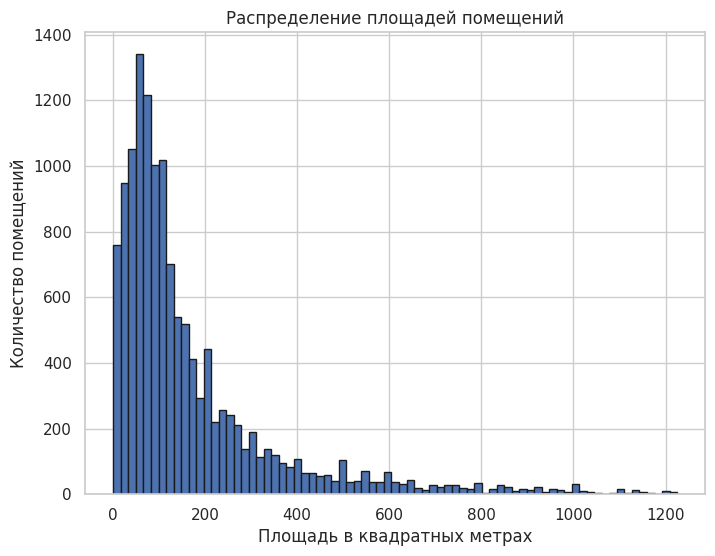

In [ ]:
figsize(8, 6)

plt.hist(df_rent['square, m^2'], bins = 75, edgecolor='k')

plt.xlabel('Площадь в квадратных метрах')
plt.ylabel('Количество помещений')
plt.title('Распределение площадей помещений')
plt.show()

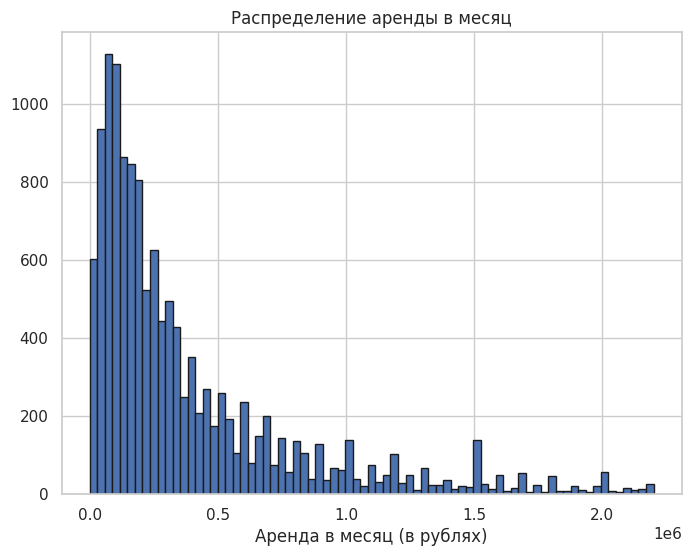

In [ ]:
figsize(8, 6)

plt.hist(df_rent['rent, rub/month'], bins = 75, edgecolor='k')

plt.xlabel('Аренда в месяц (в рублях)')
plt.title('Распределение аренды в месяц')
plt.show()

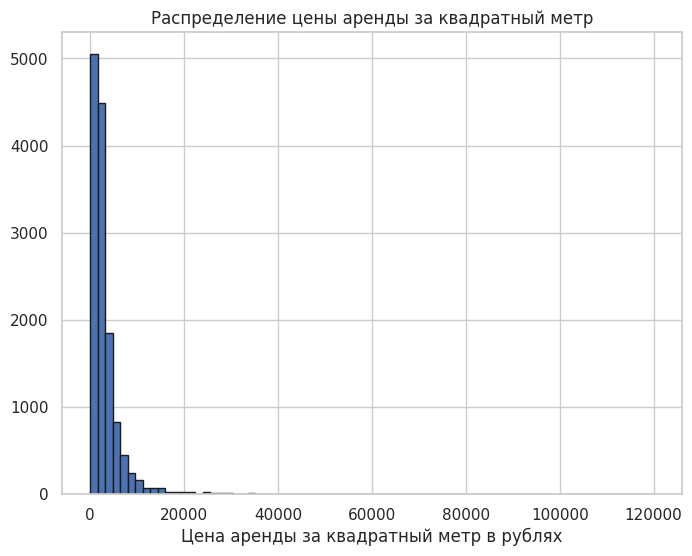

In [ ]:
figsize(8, 6)

plt.hist(df_rent['price_per_sqm, rub/month'], bins = 75, edgecolor='k')

plt.xlabel('Цена аренды за квадратный метр в рублях')
plt.title('Распределение цены аренды за квадратный метр')
plt.show()

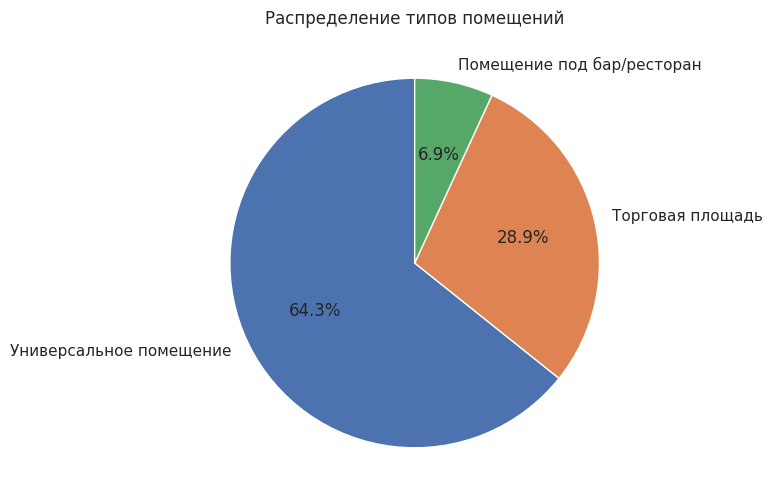

In [ ]:
plt.figure(figsize=(8, 6))

type_counts = df_rent['type'].value_counts()

plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Распределение типов помещений')
plt.show()

##Univariate analysis - bars

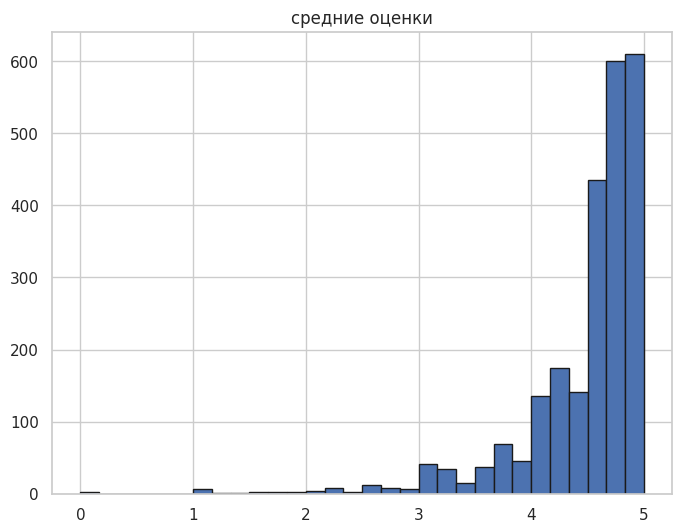

In [ ]:
figsize(8, 6)

plt.hist(df_bars['reviews.general_rating'], bins = 30, edgecolor='k')

plt.title('средние оценки')
plt.show()

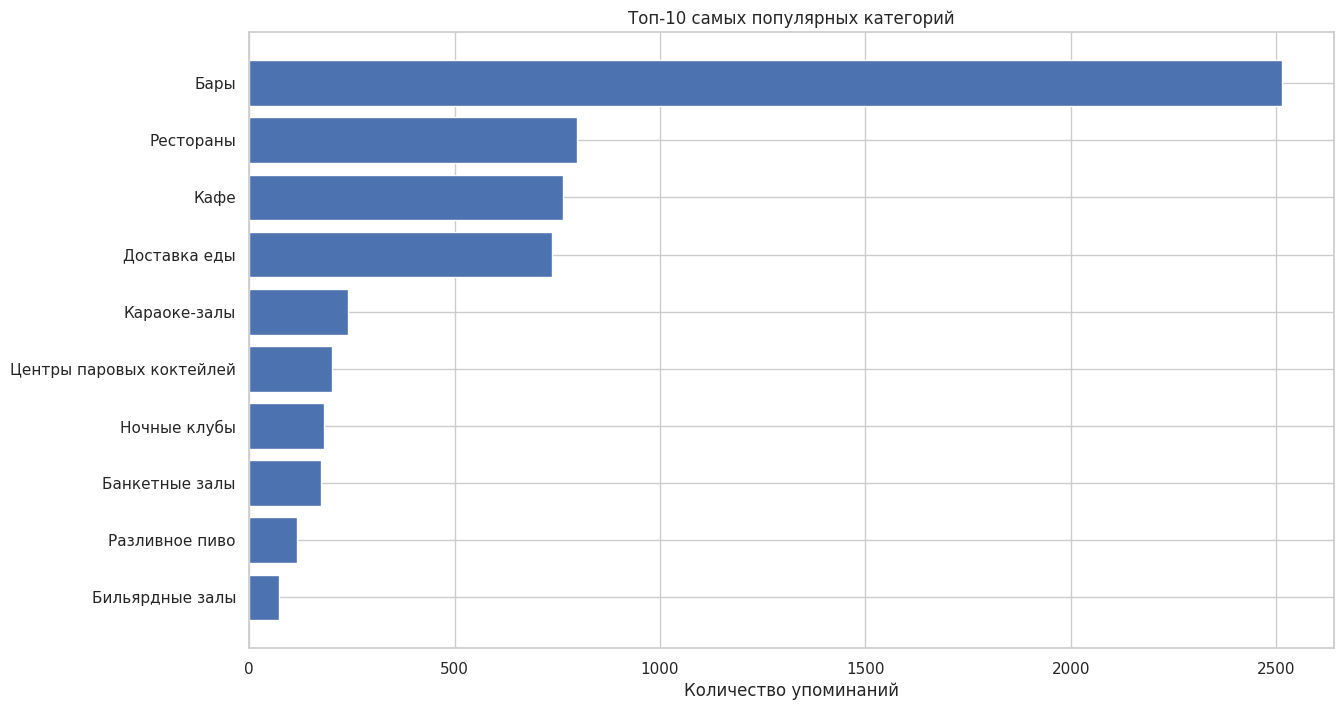

In [ ]:
from collections import Counter

categories = []
for i in df_bars['rubrics_new'].dropna():
    subcats = [i.strip() for i in i.split(',')]
    categories.extend(subcats)

category_count = {}
for i in categories:
    category_count[i] = category_count.get(i, 0) + 1

top_subcategories = dict(sorted(category_count.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(14, 8))
plt.barh(list(top_subcategories.keys()), list(top_subcategories.values()))
plt.title('Топ-10 самых популярных категорий')
plt.xlabel('Количество упоминаний')
plt.gca().invert_yaxis()
plt.show()

## Multivariate analysis - rent

In [ ]:
df_rent.groupby(['city', 'district']).agg({'rent, rub/month': ['mean', 'median', 'max', 'min'], 'price_per_sqm, rub/month': ['mean', 'median', 'max', 'min']})

rent, rub/month                    \
                                                   mean    median     max   
city         district                                                       
Екатеринбург Автономная Республика Крым   125000.000000  125000.0  125000   
             Айский сельсовет              59490.000000   59490.0   59490   
             Академический район          165835.532609  117753.0  760000   
             Алматинская область          182107.142857  143250.0  398500   
             Алтайский край               450000.000000  450000.0  450000   
...                                                 ...       ...     ...   
Челябинск    район Марфино                281600.000000  281600.0  463200   
             район Нагатинский Затон      236880.000000  236880.0  236880   
             район Перово                 110000.000000  110000.0  110000   
             район Сокол                  120000.000000  120000.0  120000   
             район Хамовники              148179.875000  110937.5  399594   

                                                price_per_sqm, rub/month  \
                                            min                     mean   
city         district                                                      
Екатеринбург Автономная Республика Крым  125000              1250.000000   
             Айский сельсовет             59490               900.000000   
             Академический район           4000              1525.880435   
             Алматинская область           6000              1514.357143   
             Алтайский край              450000               466.000000   
...                                         ...                      ...   
Челябинск    район Марфино               100000              1500.000000   
             район Нагатинский Затон     236880               450.000000   
             район Перово                110000               617.000000   
             район Сокол                 120000               150.000000   
             район Хамовники              40000               892.750000   

                                                             
                                         median   max   min  
city         district                                        
Екатеринбург Автономная Республика Крым  1250.0  1250  1250  
             Айский сельсовет             900.0   900   900  
             Академический район         1500.0  2536   500  
             Алматинская область         1406.0  3000   675  
             Алтайский край               466.0   466   466  
...                                         ...   ...   ...  
Челябинск    район Марфино               1500.0  2000  1000  
             район Нагатинский Затон      450.0   450   450  
             район Перово                 617.0   617   617  
             район Сокол                  150.0   150   150  
             район Хамовники              845.5  1600   416  

[1346 rows x 8 columns]

In [ ]:
ciry_distr_agg = df_rent.groupby(['city', 'district']).agg({'square, m^2': ['mean'], 'rent, rub/month': ['mean', 'median', 'max', 'min'], 'price_per_sqm, rub/month': ['mean', 'median', 'max', 'min']})

In [ ]:
cities = df_rent['city'].unique()

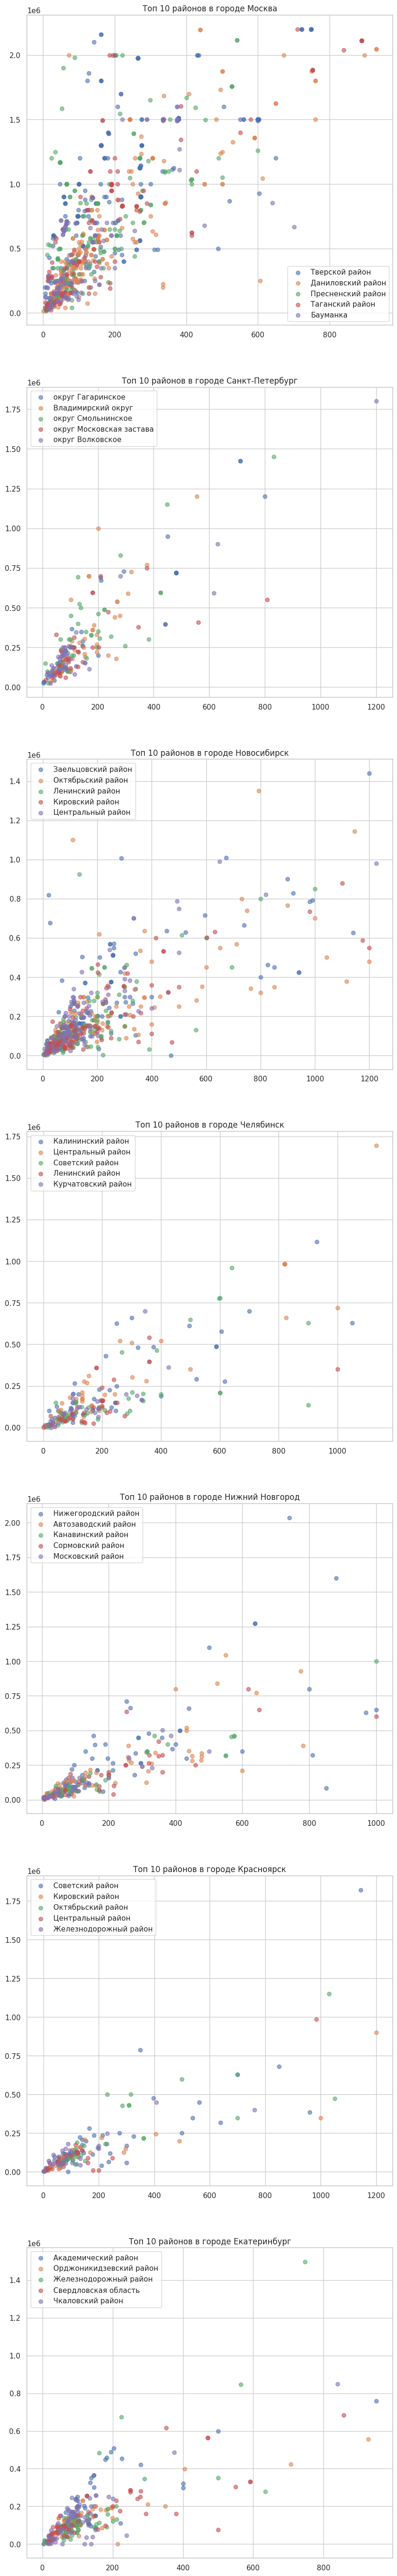

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(10, 70))
axes = axes.flatten()

for i, city in enumerate(cities):
    df_city = df_rent[df_rent['city'] == city]
    top_districts = df_city['district'].value_counts().head(5).index
    print()
    for district in top_districts:
        df_district = df_city[df_city['district'] == district]
        axes[i].scatter(df_district['square, m^2'], df_district['rent, rub/month'], label=district, alpha=0.6)

    axes[i].legend()
    axes[i].set_title(f'Топ 10 районов в городе {city}')

plt.show()

In [ ]:
def new_category(square):
    if 50 <= square < 120:
        return 'Средняя'
    elif 120 <= square < 300:
        return 'Большая'
    elif 300 <= square < 600:
        return 'Крупная'
    else:
        return 'Очень крупная'

In [ ]:
df_rent = df_rent[df_rent['square, m^2'] >= 50]
df_rent['square_category'] = df_rent['square, m^2'].apply(new_category)

/tmp/ipython-input-2584586023.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



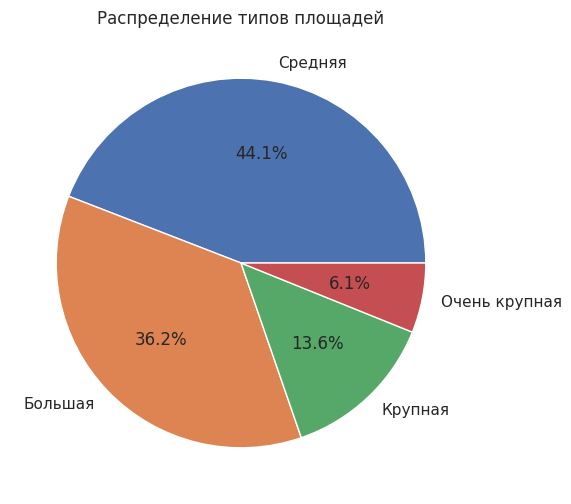

In [ ]:
plt.figure(figsize=(8, 6))

category_counts = df_rent['square_category'].value_counts()

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')

plt.title('Распределение типов площадей')
plt.show()

In [ ]:
df_rent.groupby(['square_category', 'type']).agg({'rent, rub/month': ['mean', 'count']})

rent, rub/month      
                                                      mean count
square_category type                                            
Большая         Помещение под бар/ресторан    5.987866e+05   319
                Торговая площадь              5.754321e+05  1050
                Универсальное помещение       4.377308e+05  2494
Крупная         Помещение под бар/ресторан    1.014467e+06   121
                Торговая площадь              8.322685e+05   347
                Универсальное помещение       7.504299e+05   985
Очень крупная   Помещение под бар/ресторан    1.318455e+06    55
                Торговая площадь              1.177830e+06   129
                Универсальное помещение       1.043949e+06   468
Средняя         Помещение под бар/ресторан    2.771539e+05   325
                Торговая площадь              2.836455e+05  1452
                Универсальное помещение       2.116604e+05  2935

In [ ]:
df_rent.groupby(['city', 'square_category']).agg({'rent, rub/month': ['mean', 'count']})

rent, rub/month      
                                           mean count
city            square_category                      
Екатеринбург    Большая            2.408858e+05   304
                Крупная            4.916869e+05   104
                Очень крупная      7.720899e+05    57
                Средняя            1.217536e+05   485
Красноярск      Большая            1.534319e+05   104
                Крупная            3.584265e+05    51
                Очень крупная      5.777491e+05    22
                Средняя            9.886511e+04   130
Москва          Большая            6.807114e+05  2125
                Крупная            1.077030e+06   770
                Очень крупная      1.437862e+06   312
                Средняя            3.391197e+05  2478
Нижний Новгород Большая            2.181377e+05   148
                Крупная            4.175399e+05    79
                Очень крупная      8.244217e+05    30
                Средняя            9.083968e+04   144
Новосибирск     Большая            2.200079e+05   471
                Крупная            3.598569e+05   169
                Очень крупная      6.681970e+05    96
                Средняя            1.072859e+05   518
Санкт-Петербург Большая            3.521037e+05   521
                Крупная            6.717943e+05   188
                Очень крупная      1.013947e+06    96
                Средняя            1.647987e+05   753
Челябинск       Большая            1.677104e+05   190
                Крупная            3.466782e+05    92
                Очень крупная      5.505729e+05    39
                Средняя            8.902791e+04   204

In [ ]:
global_group = df_rent.groupby(['city', 'square_category', 'type']).agg({'rent, rub/month': ['mean', 'count']})

In [ ]:
city_group = df_rent.groupby('city').agg({'rent, rub/month': ['mean']})

In [ ]:
for i, city in enumerate(df_rent['city'].unique()):
    print('|' * 100)
    print('ГОРОД:')
    print(city.upper())
    print(global_group.loc[city])
    print('-'* 50)
    print(global_group.loc[city, ('rent, rub/month', 'mean')] - city_group.values[i])

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
ГОРОД:
МОСКВА
                                           rent, rub/month      
                                                      mean count
square_category type                                            
Большая         Помещение под бар/ресторан    8.316913e+05   179
                Торговая площадь              7.701232e+05   631
                Универсальное помещение       6.172558e+05  1315
Крупная         Помещение под бар/ресторан    1.271976e+06    71
                Торговая площадь              1.131802e+06   174
                Универсальное помещение       1.032512e+06   525
Очень крупная   Помещение под бар/ресторан    1.569982e+06    31
                Торговая площадь              1.478834e+06    66
                Универсальное помещение       1.406235e+06   215
Средняя         Помещение под бар/ресторан    3.756420e+05   186
                Торговая площадь        

In [ ]:
df_rent.groupby(['city', 'square_category']).agg({'rent, rub/month': ['mean', 'count']}).sort_values(('rent, rub/month', 'mean'))

rent, rub/month      
                                           mean count
city            square_category                      
Челябинск       Средняя            8.902791e+04   204
Нижний Новгород Средняя            9.083968e+04   144
Красноярск      Средняя            9.886511e+04   130
Новосибирск     Средняя            1.072859e+05   518
Екатеринбург    Средняя            1.217536e+05   485
Красноярск      Большая            1.534319e+05   104
Санкт-Петербург Средняя            1.647987e+05   753
Челябинск       Большая            1.677104e+05   190
Нижний Новгород Большая            2.181377e+05   148
Новосибирск     Большая            2.200079e+05   471
Екатеринбург    Большая            2.408858e+05   304
Москва          Средняя            3.391197e+05  2478
Челябинск       Крупная            3.466782e+05    92
Санкт-Петербург Большая            3.521037e+05   521
Красноярск      Крупная            3.584265e+05    51
Новосибирск     Крупная            3.598569e+05   169
Нижний Новгород Крупная            4.175399e+05    79
Екатеринбург    Крупная            4.916869e+05   104
Челябинск       Очень крупная      5.505729e+05    39
Красноярск      Очень крупная      5.777491e+05    22
Новосибирск     Очень крупная      6.681970e+05    96
Санкт-Петербург Крупная            6.717943e+05   188
Москва          Большая            6.807114e+05  2125
Екатеринбург    Очень крупная      7.720899e+05    57
Нижний Новгород Очень крупная      8.244217e+05    30
Санкт-Петербург Очень крупная      1.013947e+06    96
Москва          Крупная            1.077030e+06   770
                Очень крупная      1.437862e+06   312

вывод: очень крупные в бюджет не вписываются, НАХУЙ!!

In [ ]:
df_rent = df_rent[df_rent['square_category'] != 'Очень крупная']

In [ ]:
df_rent.columns

Index(['rent, rub/month', 'address', 'city', 'price_per_sqm, rub/month',
       'square, m^2', 'type', 'url', 'OSM_address', 'district',
       'square_category'],
      dtype='object')

кодирование

In [ ]:
df_rent['square_category'].unique()

array(['Большая', 'Крупная', 'Средняя'], dtype=object)

In [ ]:
label_enconding = {'Средняя': 1, 'Большая': 2, 'Крупная': 3}

df_rent['square_category_encoding'] = df_rent['square_category'].map(label_enconding)

In [ ]:
list_to_corr = ['rent, rub/month', 'price_per_sqm, rub/month',
                'square, m^2', 'square_category']

<Axes: >

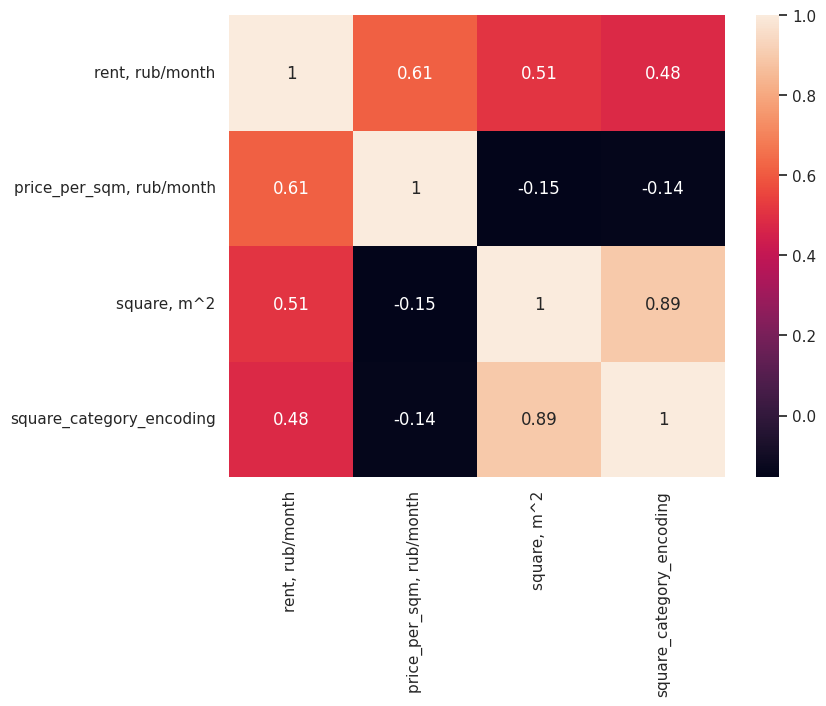

In [ ]:
sns.heatmap(df_rent.corr(numeric_only = True), annot=True)

In [ ]:
df_rent.columns

Index(['rent, rub/month', 'address', 'city', 'price_per_sqm, rub/month',
       'square, m^2', 'type', 'url', 'OSM_address', 'district',
       'square_category', 'square_category_encoding'],
      dtype='object')

In [ ]:
df_rent['address'].sample(10)

,address
11293,улица Вилюйская
12047,Победы проспект
6162,улица Бутлерова
4800,улица Смольная
5226,улица Дмитровка Б.
6328,улица Большая Садовая
3968,Вернадского проспект
1909,Автозаводский 2-й проезд
4157,улица Новокосинская
9974,проспект Старорусский


## Multivariate analysis - bars

In [ ]:
df_bars

,address_name,name,address.postcode,point.lat,point.lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new
0,"деревня Сосенки, 150","New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды"
1,"Скандинавский бульвар, 12","The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары
2,"улица Александры Монаховой, 90 к4","Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды"
3,"улица Александры Монаховой, 90 к3","The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары
4,"улица Липовый парк, 8 к2","Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды"
...,...,...,...,...,...,...,...,...,...,...,...
2523,"Комсомольский проспект, 92","Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары
2524,"40-летия Победы, 1","On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары
2525,"шоссе Металлургов, 5а/1","Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы"
2526,"улица 60-летия Октября, 38","Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе"


In [ ]:
df_bars = df_bars.rename(columns={'point.lat': 'lat', 'point.lon': 'lon'})

In [ ]:
site_lat = df_bars.lat # широта
site_lon = df_bars.lon # долгота
bars_name = df_bars.name

In [ ]:
df_rent['city'].unique()

array(['Москва', 'Санкт-Петербург', 'Новосибирск', 'Челябинск',
       'Нижний Новгород', 'Красноярск', 'Екатеринбург'], dtype=object)

In [ ]:
cities = df_rent['city'].unique()

for city in cities:
    df_city = df_bars[df_bars['city'] == city]

    data = [go.Scattermapbox(
        lat=site_lat, #широта
        lon=site_lon, #долгота
        mode='markers', #отображаем точки
        marker=dict(
            size=10,
            color='rgb(255, 125, 0)',
            opacity=0.5 #полупрозрачность
        ),
        text=bars_name,
        hoverinfo='text', #только текст при наведении
        )
    ]

    city_centers = {
            'Москва': (55.7558, 37.6173),
            'Санкт-Петербург': (59.9343, 30.3351),
            'Новосибирск': (55.0084, 82.9357),
            'Екатеринбург': (56.8389, 60.6057),
            'Красноярск': (56.0153, 92.8932),
            'Нижний Новгород': (56.3269, 44.0059),
            'Челябинск': (55.1644, 61.4368)
        }
    center_lat, center_lon = city_centers.get(city, (55.0, 37.0))

    layout = go.Layout(
        title=f'Карта баров в городе: {city}',
        autosize=True, #автоматический размер карты
        showlegend=False,
        mapbox=dict(
            style="open-street-map",
            bearing=0, #поворот карты
            center=dict(
                lat=center_lat,
                lon=center_lon
            ),
            pitch=0, #наклон карты
            zoom=10,
        ),
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

## Merge

In [ ]:
df_bars

,address_name,name,address.postcode,lat,lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new
0,"деревня Сосенки, 150","New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды"
1,"Скандинавский бульвар, 12","The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары
2,"улица Александры Монаховой, 90 к4","Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды"
3,"улица Александры Монаховой, 90 к3","The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары
4,"улица Липовый парк, 8 к2","Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды"
...,...,...,...,...,...,...,...,...,...,...,...
2523,"Комсомольский проспект, 92","Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары
2524,"40-летия Победы, 1","On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары
2525,"шоссе Металлургов, 5а/1","Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы"
2526,"улица 60-летия Октября, 38","Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе"


In [ ]:
df_bars['address_name'] = df_bars['address_name'].str.split(',').str[0]

In [ ]:
df_bars = df_bars.rename(columns={'address_name': 'address'})

In [ ]:
df_bars

,address,name,address.postcode,lat,lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new
0,деревня Сосенки,"New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды"
1,Скандинавский бульвар,"The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары
2,улица Александры Монаховой,"Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды"
3,улица Александры Монаховой,"The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары
4,улица Липовый парк,"Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды"
...,...,...,...,...,...,...,...,...,...,...,...
2523,Комсомольский проспект,"Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары
2524,40-летия Победы,"On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары
2525,шоссе Металлургов,"Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы"
2526,улица 60-летия Октября,"Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе"


In [ ]:
df_bars_merge = df_bars.merge(df_rent[['address', 'city', 'district']].drop_duplicates(), on=['address', 'city'], how='left')

In [ ]:
df_bars_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   address                                  3982 non-null   object 
 1   name                                     3982 non-null   object 
 2   address.postcode                         3981 non-null   float64
 3   lat                                      3982 non-null   float64
 4   lon                                      3982 non-null   float64
 5   reviews.general_rating                   3818 non-null   float64
 6   reviews.general_review_count             3802 non-null   float64
 7   reviews.general_review_count_with_stars  3847 non-null   float64
 8   reviews.org_rating                       3818 non-null   float64
 9   city                                     3982 non-null   object 
 10  rubrics_new                              3982 no

In [ ]:
df_bars_merge

,address,name,address.postcode,lat,lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new,district
0,деревня Сосенки,"New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды",NaN
1,Скандинавский бульвар,"The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары,NaN
2,улица Александры Монаховой,"Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды",Москва
3,улица Александры Монаховой,"The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары,Москва
4,улица Липовый парк,"Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3977,Комсомольский проспект,"Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары,Курчатовский район
3978,40-летия Победы,"On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары,NaN
3979,шоссе Металлургов,"Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы",NaN
3980,улица 60-летия Октября,"Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе",Брянская область


## Дозаполнение

In [ ]:
df_bars_merge['postcode_3'] = df_bars_merge['address.postcode'].astype(str).str[:3]

In [ ]:
df_postcodes = pd.read_csv('postcodes.csv')
df_postcodes = df_postcodes.drop_duplicates()
df_postcodes = df_postcodes.rename(columns={'Город': 'city', 'Район': 'district', 'Индекс': 'postcode_district'})

In [ ]:
df_postcodes

,city,district,postcode_district
0,Москва,район Коммунарка,108
1,Москва,Чернево,125
2,Москва,Гавриково,125
3,Москва,район Северное Бутово,117
4,Москва,Бабушкинский район,129
...,...,...,...
306,Екатеринбург,район Кольцово,623
307,Екатеринбург,район Арамиль,623
308,Екатеринбург,район Широкая Речка,620
309,Екатеринбург,район Верхняя Пышма,623


In [ ]:
df_bars_merge = df_bars_merge.merge(df_postcodes, on=['district', 'city'], how='left')
df_bars_merge['postcode_district'] = df_bars_merge['postcode_district'].astype(str).str[:3]

In [ ]:
def difference_district_problem(df_bars):
    df = df_bars_merge.copy()

    mask = df['postcode_3'] != df['postcode_district']

    df.loc[mask, 'district'] = np.nan

    return df

In [ ]:
df_bars_merge = difference_district_problem(df_bars_merge)

In [ ]:
df_bars_merge = df_bars_merge.drop(columns='postcode_district')

In [ ]:
def fill_districts(df_bars_merge):
    df = df_bars_merge.copy()

    postcodes_nan_set = df[df['district'].isna()]['postcode_3'].unique()

    for postcode in postcodes_nan_set:
        bars_available = df[(df['postcode_3'] == postcode) & (df['district'].notna())]
        bars_nan = df[(df['postcode_3'] == postcode) & (df['district'].isna())]

        if len(bars_available) == 0:
            continue

        for i, bar in bars_nan.iterrows():
            distance = np.sqrt((bars_available['lat'] - bar['lat']) ** 2 + (bars_available['lon'] - bar['lon']) ** 2)

            near_index = distance.idxmin()
            near_district = df.loc[near_index, 'district']
            df.loc[i, 'district'] = near_district

    return df

In [ ]:
df_bars_merge = fill_districts(df_bars_merge)

In [ ]:
df_bars_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   address                                  3982 non-null   object 
 1   name                                     3982 non-null   object 
 2   address.postcode                         3981 non-null   float64
 3   lat                                      3982 non-null   float64
 4   lon                                      3982 non-null   float64
 5   reviews.general_rating                   3818 non-null   float64
 6   reviews.general_review_count             3802 non-null   float64
 7   reviews.general_review_count_with_stars  3847 non-null   float64
 8   reviews.org_rating                       3818 non-null   float64
 9   city                                     3982 non-null   object 
 10  rubrics_new                              3982 no

In [ ]:
df_bars_merge

,address,name,address.postcode,lat,lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new,district,postcode_3
0,деревня Сосенки,"New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды",NaN,108
1,Скандинавский бульвар,"The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары,NaN,108
2,улица Александры Монаховой,"Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды",NaN,108
3,улица Александры Монаховой,"The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары,NaN,108
4,улица Липовый парк,"Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды",NaN,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,Комсомольский проспект,"Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары,Курчатовский район,454
3978,40-летия Победы,"On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары,Курчатовский район,454
3979,шоссе Металлургов,"Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы",Советский район,454
3980,улица 60-летия Октября,"Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе",Центральный район,454


In [ ]:
df = df_bars_merge.copy()

/tmp/ipython-input-1474242497.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



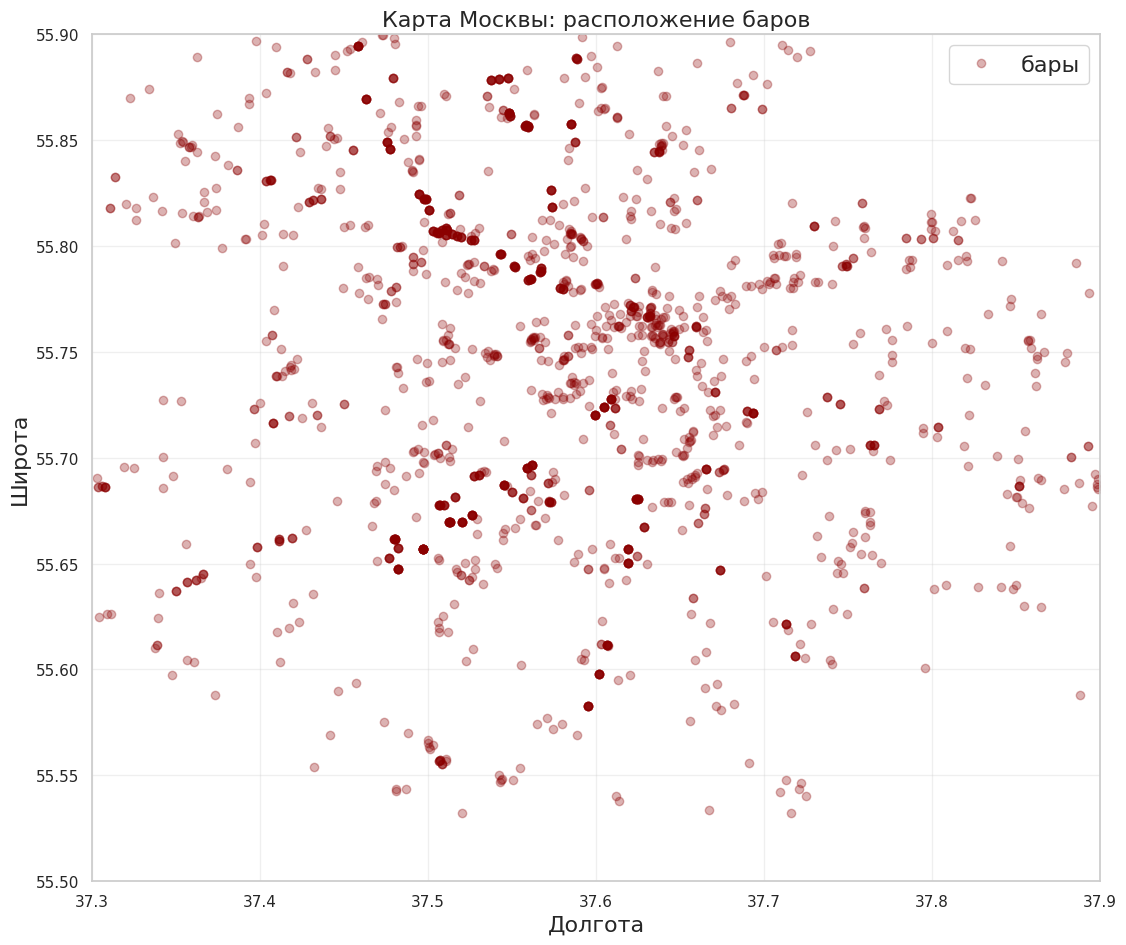

In [ ]:
moscow_data = df[df['city'] == 'Москва']
map_data = moscow_data[(moscow_data['lat'] > 55.5) & (moscow_data['lat'] < 55.9) & (moscow_data['lon'] > 37.3) & (moscow_data['lon'] < 37.9)]

sns.set(style='whitegrid')
plt.figure(figsize=(13, 11))
plt.plot(map_data['lon'], map_data['lat'], 'ro', label='бары', alpha=0.3, color='darkred')
plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта Москвы: расположение баров', fontsize=16)
plt.xlim(37.3, 37.9)
plt.ylim(55.5, 55.9)
plt.legend(fontsize=16, frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df

,address,name,address.postcode,lat,lon,reviews.general_rating,reviews.general_review_count,reviews.general_review_count_with_stars,reviews.org_rating,city,rubrics_new,district,postcode_3
0,деревня Сосенки,"New Moscow, ресторан",108802.0,55.554086,37.431872,4.9,11.0,16.0,4.9,Москва,"Бары, Рестораны, Доставка еды",NaN,108
1,Скандинавский бульвар,"The Beer, крафтовый бар",108801.0,55.562626,37.501272,5.0,9.0,17.0,4.8,Москва,Бары,NaN,108
2,улица Александры Монаховой,"Брискетная №1, паб",108826.0,55.542578,37.480596,4.4,11.0,15.0,4.4,Москва,"Бары, Доставка еды",NaN,108
3,улица Александры Монаховой,"The Beer, крафтовый бар",108826.0,55.543761,37.481012,4.7,6.0,13.0,4.8,Москва,Бары,NaN,108
4,улица Липовый парк,"Липа Бар, гастробар",108801.0,55.570096,37.488297,4.7,23.0,40.0,4.7,Москва,"Бары, Кафе, Доставка еды",NaN,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,Комсомольский проспект,"Red Card, спортбар",454100.0,55.192700,61.294790,4.9,35.0,54.0,4.9,Челябинск,Бары,Курчатовский район,454
3978,40-летия Победы,"On taps, бар",454100.0,55.191844,61.281953,4.8,65.0,66.0,4.8,Челябинск,Бары,Курчатовский район,454
3979,шоссе Металлургов,"Ez bar, танцевальный бар",454038.0,55.249577,61.399960,4.7,137.0,167.0,4.7,Челябинск,"Бары, Ночные клубы",Советский район,454
3980,улица 60-летия Октября,"Билли Бонс, гриль-бар",454047.0,55.262826,61.385830,4.6,43.0,63.0,4.6,Челябинск,"Бары, Доставка еды, Кафе",Центральный район,454


In [ ]:
df = df[(df['city'] == 'Москва') & (df['reviews.general_rating'] >= 3.5) & (df['reviews.general_review_count'] >= 10)]

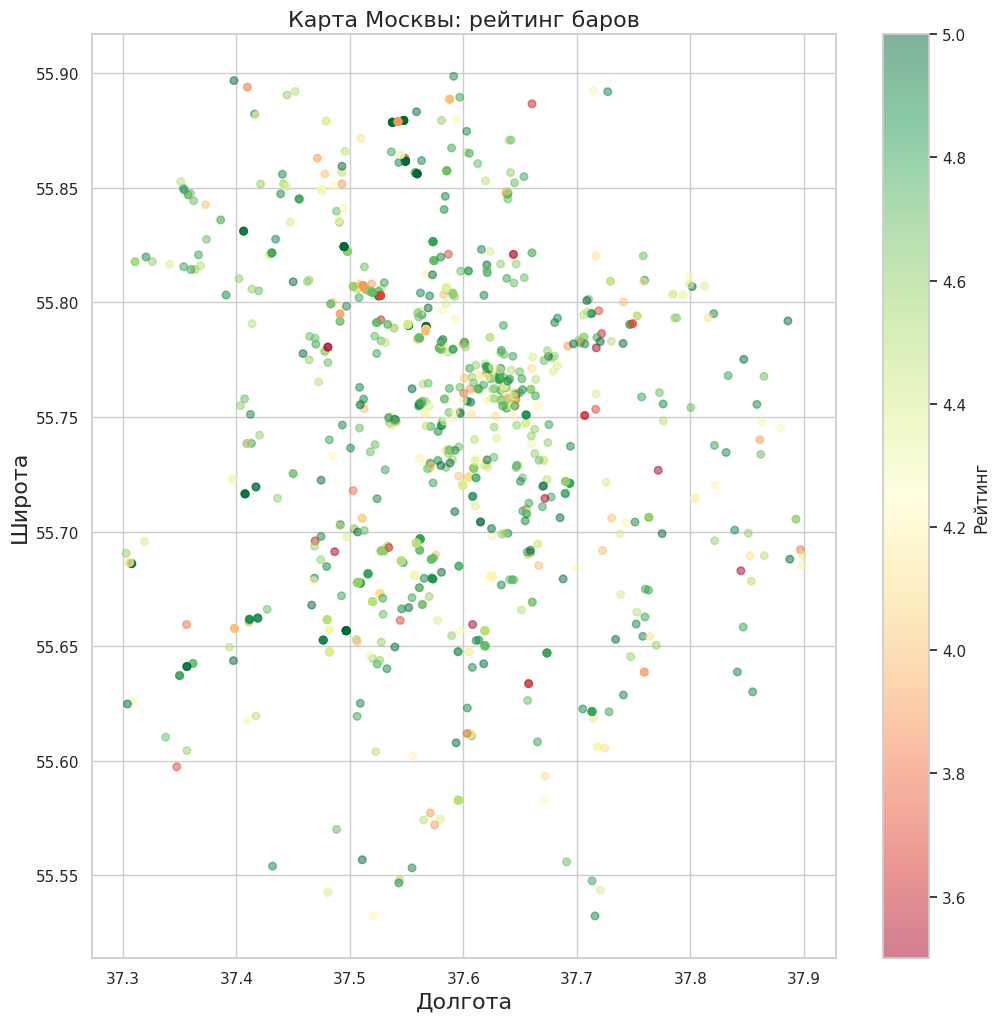

In [ ]:
data = df[(df['city'] == 'Москва') & (df['lat'] > 55.5) & (df['lat'] < 55.9) & (df['lon'] > 37.3) & (df['lon'] < 37.9)]

plt.figure(figsize=(12, 12))
x = data['lon']
y = data['lat']
plt.scatter(x, y, alpha=0.5, c=pd.to_numeric(data['reviews.general_rating']), cmap='RdYlGn', s=30)
plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта Москвы: рейтинг баров', fontsize=16)
plt.colorbar(label='Рейтинг')
plt.show()

In [ ]:
district_rating = df_bars_merge.groupby(['city', 'district', 'postcode_3']).agg({'reviews.general_rating': ['mean', 'count']})

In [ ]:
Moscow_district_rating = district_rating.loc['Москва'].sort_values(by=('reviews.general_rating', 'mean'))
Saint_district_rating = district_rating.loc['Санкт-Петербург'].sort_values(by=('reviews.general_rating', 'mean'))

In [ ]:
admi_rating = df_bars_merge.groupby(['city', 'postcode_3']).agg({'reviews.general_rating': ['mean', 'count']}).reset_index()

In [ ]:
admi_rating = admi_rating[admi_rating['postcode_3'] != 'nan']
admi_rating = admi_rating.set_index(['city', 'postcode_3'])

In [ ]:
Moscow_admi_rating = admi_rating.loc['Москва'].sort_values(by=('reviews.general_rating', 'mean'))
Saint_admi_rating = admi_rating.loc['Санкт-Петербург'].sort_values(by=('reviews.general_rating', 'mean'))

In [ ]:
Moscow_admi_rating[('reviews.general_rating', 'count')].min()

6

### Москва

In [ ]:
Moscow_district_rating = Moscow_district_rating[(Moscow_district_rating[('reviews.general_rating', 'count')] >= 10)]
Moscow_admi_rating = Moscow_admi_rating[(Moscow_admi_rating[('reviews.general_rating', 'count')] >= 20)]

In [ ]:
mean_count_Moscow_d = Moscow_district_rating[('reviews.general_rating', 'count')].mean()
mean_mean_Moscow_d = Moscow_district_rating[('reviews.general_rating', 'mean')].mean()
mean_count_Moscow_p = Moscow_admi_rating[('reviews.general_rating', 'count')].mean()
mean_mean_Moscow_p = Moscow_admi_rating[('reviews.general_rating', 'mean')].mean()

In [ ]:
Moscow_perspective_districts = Moscow_district_rating[(Moscow_district_rating[('reviews.general_rating', 'count')] <= mean_count_Moscow_d) &
                                                      (abs(Moscow_district_rating[('reviews.general_rating', 'mean')] - mean_mean_Moscow_d) <= 0.1)].reset_index()

In [ ]:
Moscow_perspective_admi = Moscow_admi_rating[(Moscow_admi_rating[('reviews.general_rating', 'count')] <= mean_count_Moscow_p) &
                                                      abs((Moscow_admi_rating[('reviews.general_rating', 'mean')] - mean_mean_Moscow_p) <= 0.1)].reset_index()

In [ ]:
postcodes_perspective = list(set(Moscow_perspective_districts['postcode_3']).intersection(set(Moscow_perspective_admi['postcode_3'])))

In [ ]:
Moscow_perspective_districts_final = Moscow_perspective_districts[Moscow_perspective_districts['postcode_3'].isin(postcodes_perspective)]

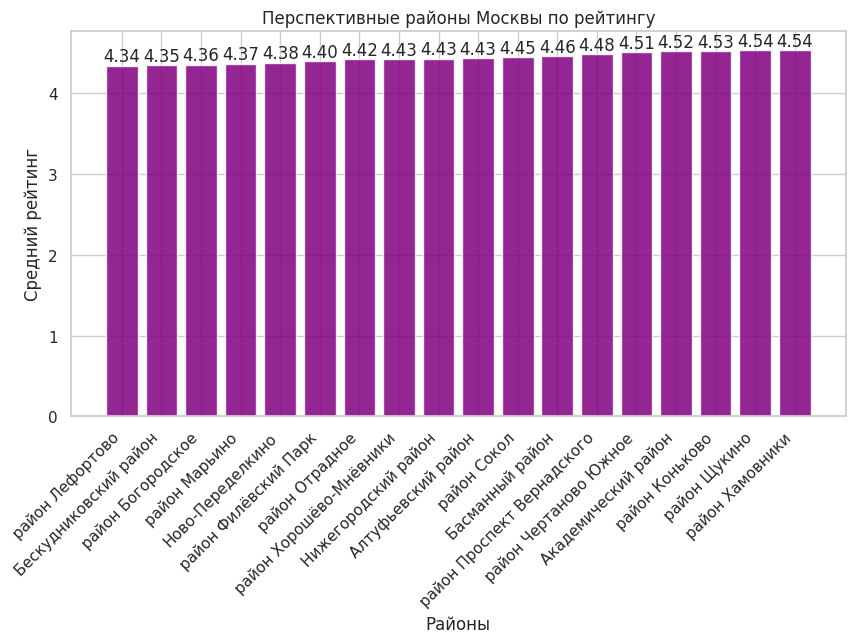

In [ ]:
plt.figure(figsize=(10, 5))
bars_msk = plt.bar(Moscow_perspective_districts['district'], Moscow_perspective_districts[('reviews.general_rating', 'mean')], color='purple', alpha = 0.85)

plt.ylabel('Средний рейтинг')
plt.xlabel('Районы')
plt.title('Перспективные районы Москвы по рейтингу')
plt.xticks(rotation=45, ha='right')

#подпись рейтингов для каждого столбца: https://habr.com/ru/articles/946750/
for bar in bars_msk:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

### Питер

In [ ]:
Saint_district_rating = Saint_district_rating[(Saint_district_rating[('reviews.general_rating', 'count')] >= 10)]
Saint_district_rating = Saint_district_rating[(Saint_district_rating[('reviews.general_rating', 'count')] >= 20)]

In [ ]:
mean_count_Saint_d = Saint_district_rating[('reviews.general_rating', 'count')].mean()
mean_mean_Saint_d = Saint_district_rating[('reviews.general_rating', 'mean')].mean()
mean_count_Saint_p = Saint_admi_rating[('reviews.general_rating', 'count')].mean()
mean_mean_Saint_p = Saint_admi_rating[('reviews.general_rating', 'mean')].mean()

In [ ]:
Saint_perspective_districts = Saint_district_rating[(Saint_district_rating[('reviews.general_rating', 'count')] <= mean_count_Saint_d) &
                                                      (abs(Saint_district_rating[('reviews.general_rating', 'mean')] - mean_mean_Saint_d) <= 0.1)].reset_index()

In [ ]:
Saint_perspective_admi = Saint_admi_rating[(Saint_admi_rating[('reviews.general_rating', 'count')] <= mean_count_Saint_p) &
                                                      abs((Saint_admi_rating[('reviews.general_rating', 'mean')] - mean_mean_Saint_p) <= 0.1)].reset_index()

In [ ]:
postcodes_perspective = list(set(Saint_perspective_districts['postcode_3']).intersection(set(Saint_perspective_admi['postcode_3'])))

In [ ]:
Saint_perspective_districts_final = Saint_perspective_districts[Saint_perspective_districts['postcode_3'].isin(postcodes_perspective)]

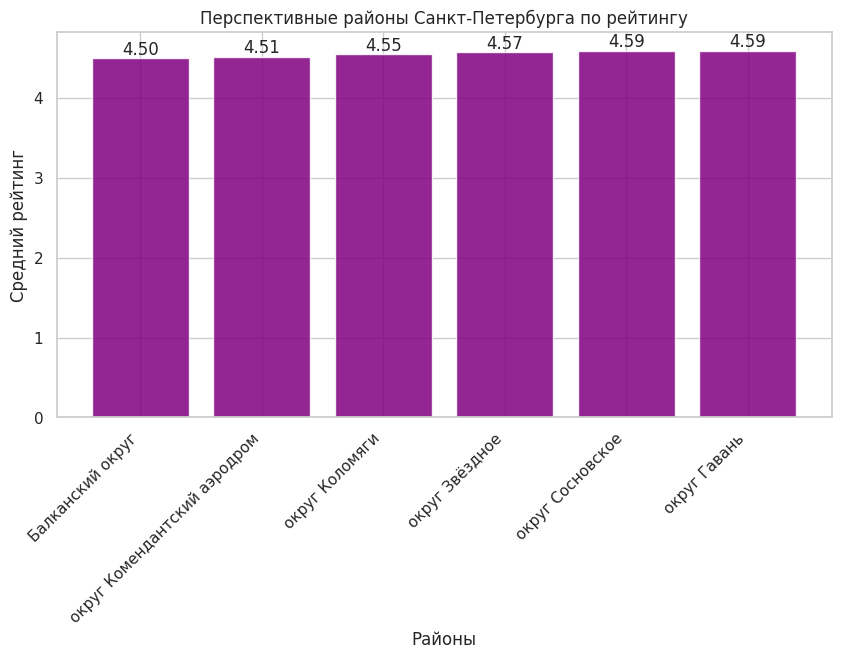

In [ ]:
plt.figure(figsize=(10, 5))
bars_spb = plt.bar(Saint_perspective_districts['district'],Saint_perspective_districts [('reviews.general_rating', 'mean')], color='purple', alpha = 0.85)

plt.ylabel('Средний рейтинг')
plt.xlabel('Районы')
plt.title('Перспективные районы Санкт-Петербурга по рейтингу')
plt.xticks(rotation=45, ha='right')

#подпись рейтингов для каждого столбца: https://habr.com/ru/articles/946750/
for bar in bars_spb:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
Saint_perspective_districts_final

district postcode_3 reviews.general_rating      
                                                 mean count
0  Балканский округ        192               4.495833    24
5      округ Гавань        199               4.592105    38

In [ ]:
Moscow_perspective_districts_final

district postcode_3 reviews.general_rating      
                                                      mean count
0        район Лефортово        111               4.342857    21
2      район Богородское        107               4.355556    27
5   район Филёвский Парк        121               4.395000    20
11       Басманный район        105               4.459091    22

### подходящие помещения москвы

москва:
-универсальные помещения во всех категориях

In [ ]:
districts_moscow = list(Moscow_perspective_districts_final['district'].unique())

In [ ]:
df_rent_moscow = df_rent[(df_rent['city'] == 'Москва') & df_rent['district'].isin(Moscow_perspective_districts_final['district'])]

In [ ]:
df_rent_moscow = df_rent_moscow[df_rent_moscow['type'] == 'Универсальное помещение']

1. Смотрим среднюю площадь

In [ ]:
df_rent_moscow_1 = df_rent_moscow[df_rent_moscow['square_category'] == 'Средняя']

In [ ]:
df_rent_moscow_1.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
599,80000,улица Авиамоторная,Москва,800,100,Универсальное помещение,https://msk.n1.ru/view/115576501/?open_card_kn,"улица Авиамоторная, 35, Москва, Россия",район Лефортово,Средняя,1
3925,130000,улица Садовая-Черногрязская,Москва,1177,110,Универсальное помещение,https://msk.n1.ru/view/113576814/?open_card_kn,"улица Садовая-Черногрязская, 13 ст1, Москва, Р...",Басманный район,Средняя,1
3910,129000,улица Госпитальный Вал,Москва,1277,101,Универсальное помещение,https://msk.n1.ru/view/115701658/?open_card_kn,"улица Госпитальный Вал, 5, Москва, Россия",Басманный район,Средняя,1


2. Смотрим большую площадь

In [ ]:
df_rent_moscow_2 = df_rent_moscow[df_rent_moscow['square_category'] == 'Большая']

In [ ]:
df_rent_moscow_2.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
1336,160000,улица Авиамоторная,Москва,727,220,Универсальное помещение,https://msk.n1.ru/view/111947315/?open_card_kn,"улица Авиамоторная, 28, Москва, Россия",район Лефортово,Большая,2
4496,135910,улица Золоторожский Вал,Москва,1104,123,Универсальное помещение,https://msk.n1.ru/view/115654162/?open_card_kn,"улица Золоторожский Вал, 11 ст26, Москва, Россия",район Лефортово,Большая,2
1396,170000,улица Авиамоторная,Москва,1140,149,Универсальное помещение,https://msk.n1.ru/view/114841681/?open_card_kn,"улица Авиамоторная, 73а, Москва, Россия",район Лефортово,Большая,2


3. Смотрим крупную площадь

In [ ]:
df_rent_moscow_3 = df_rent_moscow[df_rent_moscow['square_category'] == 'Крупная']

In [ ]:
df_rent_moscow_3.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
1650,600000,Лялин переулок,Москва,1250,480,Универсальное помещение,https://msk.n1.ru/view/115152802/?open_card_kn,"Лялин переулок, 11 ст2, Москва, Россия",Басманный район,Крупная,3
4315,450000,улица Маросейка,Москва,1451,310,Универсальное помещение,https://msk.n1.ru/view/114972718/?open_card_kn,"улица Маросейка, 17, Москва, Россия",Басманный район,Крупная,3
2143,599968,улица Лефортовский Вал,Москва,1830,328,Универсальное помещение,https://msk.n1.ru/view/108838007/?open_card_kn,"улица Лефортовский Вал, 15 ст2, Москва, Россия",район Лефортово,Крупная,3


Санкт-Петербург

In [365]:
districts_saint = list(Saint_perspective_districts_final['district'].unique())

In [366]:
df_rent_saint = df_rent[(df_rent['city'] == 'Санкт-Петербург') & df_rent['district'].isin(Saint_perspective_districts_final['district'])]

1. Помещения под бары/рестораны средней площади

In [367]:
df_rent_saint_1 = df_rent_saint[df_rent_saint['type'] == 'Помещение под бар/ресторан']

In [368]:
df_rent_saint_1 = df_rent_saint[df_rent_saint['square_category'] == 'Средняя']

In [369]:
df_rent_saint_1.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
9126,75000,улица Гаванская,Санкт-Петербург,974,77,Универсальное помещение,https://spb.n1.ru/view/115389592/?open_card_kn,"улица Гаванская, 7, Санкт-Петербург, Россия",округ Гавань,Средняя,1
8655,60000,Головнина Бульвар,Санкт-Петербург,1000,60,Универсальное помещение,https://spb.n1.ru/view/111923301/?open_card_kn,"Головнина Бульвар, 3, Санкт-Петербург, Россия",округ Гавань,Средняя,1
8357,120000,проспект Крузенштерна,Санкт-Петербург,1321,90,Универсальное помещение,https://spb.n1.ru/view/115220790/?open_card_kn,"проспект Крузенштерна, 2, Санкт-Петербург, Россия",округ Гавань,Средняя,1


2. Универсальное помещение средней площади

In [370]:
df_rent_saint_2 = df_rent_saint[df_rent_saint['type'] == 'Универсальное помещение']

In [371]:
df_rent_saint_2 = df_rent_saint_2[df_rent_saint_2['square_category'] == 'Средняя']

In [372]:
df_rent_saint_2.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
9126,75000,улица Гаванская,Санкт-Петербург,974,77,Универсальное помещение,https://spb.n1.ru/view/115389592/?open_card_kn,"улица Гаванская, 7, Санкт-Петербург, Россия",округ Гавань,Средняя,1
8655,60000,Головнина Бульвар,Санкт-Петербург,1000,60,Универсальное помещение,https://spb.n1.ru/view/111923301/?open_card_kn,"Головнина Бульвар, 3, Санкт-Петербург, Россия",округ Гавань,Средняя,1
8357,120000,проспект Крузенштерна,Санкт-Петербург,1321,90,Универсальное помещение,https://spb.n1.ru/view/115220790/?open_card_kn,"проспект Крузенштерна, 2, Санкт-Петербург, Россия",округ Гавань,Средняя,1


3. Универсальное помещение большой площади


In [380]:
df_rent_saint_3 = df_rent_saint[df_rent_saint['type'] == 'Универсальное помещение']

In [381]:
df_rent_saint_3 = df_rent_saint_3[df_rent_saint_3['square_category'] == 'Большая']

In [382]:
df_rent_saint_3.sort_values(by=['price_per_sqm, rub/month', 'square, m^2']).head(3)

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district,square_category,square_category_encoding
8373,119000,проспект Крузенштерна,Санкт-Петербург,952,125,Универсальное помещение,https://spb.n1.ru/view/112260049/?open_card_kn,"проспект Крузенштерна, 2, Санкт-Петербург, Россия",округ Гавань,Большая,2
9012,150000,проспект Крузенштерна,Санкт-Петербург,1145,131,Универсальное помещение,https://spb.n1.ru/view/114006828/?open_card_kn,"проспект Крузенштерна, 2, Санкт-Петербург, Россия",округ Гавань,Большая,2
8773,210000,улица Гаванская,Санкт-Петербург,1500,140,Универсальное помещение,https://spb.n1.ru/view/115836135/?open_card_kn,"улица Гаванская, 9, Санкт-Петербург, Россия",округ Гавань,Большая,2
